# Hometask 7

### Задача 1

Даны значения величины заработной платы заёмщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]

scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной — scoring.


Найдите коэффициенты линейной регрессии, применив формулы для парной регрессии, а затем посредством метода наименьших квадратов.

Постройте scatter plot по имеющимся данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.

Оцените построенное уравнение регрессии по F-критерию Фишера.

Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы, воспользовавшись t-статистикой Стьюдента.

Решение:

Найдите коэффициенты линейной регрессии, применив формулы для парной регрессии, а затем посредством метода наименьших квадратов.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [6]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

In [7]:
b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b1

2.620538882402765

In [8]:
b0 = np.mean(scoring) - b1 * np.mean(salary)
b0

444.1773573243596

$$ y = 444.18 + 2.62 \cdot x $$

In [21]:
df = pd.DataFrame(salary, columns=['salary'])
x2 = df[['salary']].values
x2

array([[ 35.],
       [ 45.],
       [190.],
       [200.],
       [ 40.],
       [ 70.],
       [ 54.],
       [150.],
       [120.],
       [110.]])

In [22]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))
x2.shape, x2

((10, 2),
 array([[  1.,  35.],
        [  1.,  45.],
        [  1., 190.],
        [  1., 200.],
        [  1.,  40.],
        [  1.,  70.],
        [  1.,  54.],
        [  1., 150.],
        [  1., 120.],
        [  1., 110.]]))

In [23]:
df = pd.DataFrame(scoring, columns=['scoring'])
y2 = df['scoring'].values.reshape(-1, 1)
y2

array([[401.],
       [574.],
       [874.],
       [919.],
       [459.],
       [739.],
       [653.],
       [902.],
       [746.],
       [832.]])

In [24]:
XTX = x2.T.dot(x2)
np.linalg.det(XTX)

349464.00000000023

In [25]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x2.T).dot(y2)
b

array([[444.17735732],
       [  2.62053888]])

$$ y = 444.18 + 2.62 \cdot x $$

Постройте scatter plot по имеющимся данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

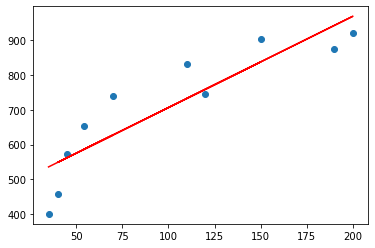

In [27]:
ox = x1
oy = b0 + b1 * ox
plt.scatter(x1, y1)
plt.plot(ox, oy, color='red')

Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.

In [28]:
z1 = b0 + b1 * x1
print(f'real scoring: {y1[:10]}')
print(f'predict: {z1[:10]}')

real scoring: [401. 574. 874. 919. 459. 739. 653. 902. 746. 832.]
predict: [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


Коэффициент детерминации:

In [29]:
R1 = z1.var() / y1.var()
R1

0.7876386635293678

Коэффициент детерминации, равный 0.7876, означает, что ~79% дисперсии переменной $y$ учитывается или объясняется моделью. Оставшиеся ~21% обусловлены какими-то ещё факторами, которые модель не учла.

In [30]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

In [31]:
mean_approximation_error(y1, z1)

0.11469251843561709

Оцените построенное уравнение регрессии по F-критерию Фишера.

$$ k_1 = 1 $$
$$ k_2 = 10 - 2 = 8 $$

In [33]:
k1 = 1
k2 = 8
T1 = (R1 / (1 - R1)) * (k2 / k1)
T1

29.67164085966437

$$ \alpha = 0.05 $$
$$ F_{crit} = F(1, 8) = 5.32 $$

In [35]:
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

$ T > F_{crit} $, поэтому уравнение регрессии статистически значимо.

Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы, воспользовавшись t-статистикой Стьюдента.

In [37]:
def standard_error_slope(x, y, z):
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [38]:
s_slope = standard_error_slope(x1, y1, z1)
s_slope

0.48108279568516005

$$ \alpha = 0.05 $$
$$ n = 10 $$
$$ t_{1 - 0.05/2, 8} = 2.306 $$

In [40]:
T = b1 / s_slope
T

5.447168150485579

Доверительный интервал

In [41]:
t = 2.306
(b1 - t * s_slope, b1 + t * s_slope)

(1.5111619555527858, 3.729915809252744)

Значение попало в ĸритичесĸую область, значит, гипотеза о равенстве нулю параметра $b_1$ отвергается.

In [42]:
def standard_error_intercept(x, y, z):
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [43]:
s_intercept = standard_error_intercept(x1, y1, z1)
s_intercept

56.46649755068153

In [44]:
T = b0 / s_intercept
T

7.866210524668863

In [46]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(313.965613972488, 574.3891006762312)

Значение попало в ĸритичесĸую область, значит, значение параметра $b_0$ является значимым.

### Задача 2

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а когда — таблица квантилей распределения Стьюдента?

Решение:

При известном стандартном отклонении  генеральной совокупности $\sigma$ и при больших $n$ при определении доверительных интервалов используется формула точности оценки $\delta = t_{y}\dfrac{\sigma}{\sqrt{n}}$, где $t_{y}$ находится исходя из функции Лапласа $\Phi(x)$.

При малых $n < 50$, в формулу $\delta = t_{y}\dfrac{s}{\sqrt{n}}$,где $s$ -  исправленное среднее квадратическое отклонение, "$t_{y}$ находится с помощью распределения Стьюдента